# Work plan
1. Download data
1. Organize data into folders
1. Finetune vgg model
1. Train model
1. Run predictions
1. Evaluate predictions
1. Submit to Kaggle

## Download data
Done offline with Kaggle command line utility in Terminal ssh session. Unzip files.

Confirmed below

## laudai
#### set up your environment

In [1]:
#run once


"""
!pip install tensorflow==1.2.1 Pillow matplotlib==2.0.2 numpy==1.13.1 Keras==1.2.2 scikit-learn==0.19.0 pandas==0.20.3 bcolz==1.0.0 h5py
"""




  Using cached tensorflow-1.2.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached Pillow-4.2.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached matplotlib-2.0.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached numpy-1.13.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached scikit_learn-0.19.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached pandas-0.20.3-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached h5py-2.7.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached mock-2.0.0-py2.py3-none-any.whl
  Using cached backports.weakref-1.0rc1-py2-none-any.whl
  Using cached Werkzeug-0.12.2-py2.py3-none-any.whl
  Using cached protobuf-3.4.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl
  Using cached pytz-2017.2-py2.py3-none-any.whl
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Using cached funcsigs-1.0.2-py2.py3-none-any.whl
  Using cached pbr-3.1.1-py2.py3-none-any.whl
  Using cached scipy-0.19.1-cp27-cp27mu-manylinux1_x86_64.whl


## Organize data into folders
only run once

In [1]:
#!pip install cPickle --no-cache-dir

In [2]:
!pip list | grep -E "tensorflow|Pillow|matplotlib|numpy|Keras|scikit-learn|pandas|bcolz|h5py"
#no show theano

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
bcolz (1.0.0)
h5py (2.7.0)
Keras (1.2.2)
matplotlib (2.0.2)
numpy (1.13.1)
pandas (0.20.3)
Pillow (4.2.1)
scikit-learn (0.19.0)
tensorflow (1.2.1)


In [3]:
# frequent file shortcuts
import os, sys
current_directory = os.getcwd()
UTIL_DIR = '/home/ymchu/laudai_DLtest_InvasiveSpecies/utils'
LESSON_HOME_DIR = current_directory
DATA_HOME_DIR = current_directory+'/data/invasive_species'

In [4]:
# set path variables
sys.path.insert(1, LESSON_HOME_DIR)
sys.path.insert(1, UTIL_DIR)
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [5]:
sys.path

['',
 '..',
 '/home/ymchu/laudai_DLtest_InvasiveSpecies/utils',
 '/home/ymchu/laudai_DLtest_InvasiveSpecies',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python27.zip',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python2.7',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python2.7/plat-linux2',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python2.7/lib-tk',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python2.7/lib-old',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python2.7/lib-dynload',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python2.7/site-packages',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg',
 '/home/ymchu/anaconda3/envs/laudaipy27env/lib/python2.7/site-packages/IPython/extensions',
 '/home/ymchu/.ipython']

In [6]:
#import utility modules
from utils import *

#plotting in jupyter notebook
%matplotlib inline

Using TensorFlow backend.


In [7]:
!pwd

/home/ymchu/laudai_DLtest_InvasiveSpecies


In [8]:
#confirm training data & csv file with labels correctly loaded
#downloaded and unpacked in terminal. 
%cd $DATA_HOME_DIR/train
%ls *.jpg | head -5
print("\ntrain_labels.csv")
!head -5 train_labels.csv

/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/train
1000.jpg
1001.jpg
1002.jpg
1003.jpg
1004.jpg

train_labels.csv
name,invasive
1,0
2,0
3,1
4,0


In [9]:
#need to move images with '1' label into invasive folder and those with '0' to harmless folder
import csv
import numpy as np

reader = csv.reader(open("train_labels.csv", "rb"), delimiter=",")
labels = list(reader)
del labels[0]
labels[0:5]

[['1', '0'], ['2', '0'], ['3', '1'], ['4', '0'], ['5', '1']]

In [10]:
#confirm labels for all training data. 2295 from contest page.
len(labels) == 2295

True

In [16]:
!ls ../
!pwd
!ls  |wc -l
#2295 + 3 directory

results  sample  test  train  valid
/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/train
2298


In [17]:
for l in labels:
    iname = l[0] + ".jpg"
    if l[1] == '0':
        try:
            !mv -t harmless/ $iname
        except:
            pass
    elif l[1]== '1':
        try:   
            !mv -t invasive/ $iname
        except:
            pass

In [18]:
!pwd
!ls invasive | wc -l
!ls harmless | wc -l

# to dispaly file count



/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/train
1448
847


In [19]:
%cd $DATA_HOME_DIR/test
%ls *.jpg | head -5
print("\ntrain_labels.csv")
!head -5 train_labels.csv

/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/test
1000.jpg
1001.jpg
1002.jpg
1003.jpg
1004.jpg
ls: write error

train_labels.csv
name,invasive
1,0
2,0
3,1
4,0


In [20]:
for l in labels:
    iname = l[0] + ".jpg"
    if l[1] == '0':
        try:
            !mv -t harmless/ $iname
        except:
            pass
    elif l[1]== '1':
        try:
            !mv -t invasive/ $iname
        except:
            pass

mv: cannot stat '1532.jpg': No such file or directory
mv: cannot stat '1533.jpg': No such file or directory
mv: cannot stat '1534.jpg': No such file or directory
mv: cannot stat '1535.jpg': No such file or directory
mv: cannot stat '1536.jpg': No such file or directory
mv: cannot stat '1537.jpg': No such file or directory
mv: cannot stat '1538.jpg': No such file or directory
mv: cannot stat '1539.jpg': No such file or directory
mv: cannot stat '1540.jpg': No such file or directory
mv: cannot stat '1541.jpg': No such file or directory
mv: cannot stat '1542.jpg': No such file or directory
mv: cannot stat '1543.jpg': No such file or directory
mv: cannot stat '1544.jpg': No such file or directory
mv: cannot stat '1545.jpg': No such file or directory
mv: cannot stat '1546.jpg': No such file or directory
mv: cannot stat '1547.jpg': No such file or directory
mv: cannot stat '1548.jpg': No such file or directory
mv: cannot stat '1549.jpg': No such file or directory
mv: cannot stat '1550.jpg': 

mv: cannot stat '1684.jpg': No such file or directory
mv: cannot stat '1685.jpg': No such file or directory
mv: cannot stat '1686.jpg': No such file or directory
mv: cannot stat '1687.jpg': No such file or directory
mv: cannot stat '1688.jpg': No such file or directory
mv: cannot stat '1689.jpg': No such file or directory
mv: cannot stat '1690.jpg': No such file or directory
mv: cannot stat '1691.jpg': No such file or directory
mv: cannot stat '1692.jpg': No such file or directory
mv: cannot stat '1693.jpg': No such file or directory
mv: cannot stat '1694.jpg': No such file or directory
mv: cannot stat '1695.jpg': No such file or directory
mv: cannot stat '1696.jpg': No such file or directory
mv: cannot stat '1697.jpg': No such file or directory
mv: cannot stat '1698.jpg': No such file or directory
mv: cannot stat '1699.jpg': No such file or directory
mv: cannot stat '1700.jpg': No such file or directory
mv: cannot stat '1701.jpg': No such file or directory
mv: cannot stat '1702.jpg': 

mv: cannot stat '1836.jpg': No such file or directory
mv: cannot stat '1837.jpg': No such file or directory
mv: cannot stat '1838.jpg': No such file or directory
mv: cannot stat '1839.jpg': No such file or directory
mv: cannot stat '1840.jpg': No such file or directory
mv: cannot stat '1841.jpg': No such file or directory
mv: cannot stat '1842.jpg': No such file or directory
mv: cannot stat '1843.jpg': No such file or directory
mv: cannot stat '1844.jpg': No such file or directory
mv: cannot stat '1845.jpg': No such file or directory
mv: cannot stat '1846.jpg': No such file or directory
mv: cannot stat '1847.jpg': No such file or directory
mv: cannot stat '1848.jpg': No such file or directory
mv: cannot stat '1849.jpg': No such file or directory
mv: cannot stat '1850.jpg': No such file or directory
mv: cannot stat '1851.jpg': No such file or directory
mv: cannot stat '1852.jpg': No such file or directory
mv: cannot stat '1853.jpg': No such file or directory
mv: cannot stat '1854.jpg': 

mv: cannot stat '1988.jpg': No such file or directory
mv: cannot stat '1989.jpg': No such file or directory
mv: cannot stat '1990.jpg': No such file or directory
mv: cannot stat '1991.jpg': No such file or directory
mv: cannot stat '1992.jpg': No such file or directory
mv: cannot stat '1993.jpg': No such file or directory
mv: cannot stat '1994.jpg': No such file or directory
mv: cannot stat '1995.jpg': No such file or directory
mv: cannot stat '1996.jpg': No such file or directory
mv: cannot stat '1997.jpg': No such file or directory
mv: cannot stat '1998.jpg': No such file or directory
mv: cannot stat '1999.jpg': No such file or directory
mv: cannot stat '2000.jpg': No such file or directory
mv: cannot stat '2001.jpg': No such file or directory
mv: cannot stat '2002.jpg': No such file or directory
mv: cannot stat '2003.jpg': No such file or directory
mv: cannot stat '2004.jpg': No such file or directory
mv: cannot stat '2005.jpg': No such file or directory
mv: cannot stat '2006.jpg': 

mv: cannot stat '2140.jpg': No such file or directory
mv: cannot stat '2141.jpg': No such file or directory
mv: cannot stat '2142.jpg': No such file or directory
mv: cannot stat '2143.jpg': No such file or directory
mv: cannot stat '2144.jpg': No such file or directory
mv: cannot stat '2145.jpg': No such file or directory
mv: cannot stat '2146.jpg': No such file or directory
mv: cannot stat '2147.jpg': No such file or directory
mv: cannot stat '2148.jpg': No such file or directory
mv: cannot stat '2149.jpg': No such file or directory
mv: cannot stat '2150.jpg': No such file or directory
mv: cannot stat '2151.jpg': No such file or directory
mv: cannot stat '2152.jpg': No such file or directory
mv: cannot stat '2153.jpg': No such file or directory
mv: cannot stat '2154.jpg': No such file or directory
mv: cannot stat '2155.jpg': No such file or directory
mv: cannot stat '2156.jpg': No such file or directory
mv: cannot stat '2157.jpg': No such file or directory
mv: cannot stat '2158.jpg': 

mv: cannot stat '2292.jpg': No such file or directory
mv: cannot stat '2293.jpg': No such file or directory
mv: cannot stat '2294.jpg': No such file or directory
mv: cannot stat '2295.jpg': No such file or directory


In [21]:
!pwd
!ls invasive | wc -l
!ls harmless | wc -l

# to dispaly file count

/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/test
976
555


In [22]:
ls

harmless/  invasive/  train_labels.csv  unknown/


In [23]:
%cd $DATA_HOME_DIR
!tree -d

/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species
.
├── results
├── sample
│   ├── train
│   │   ├── harmless
│   │   └── invasive
│   └── valid
│       ├── harmless
│       └── invasive
├── test
│   ├── harmless
│   ├── invasive
│   └── unknown
├── train
│   ├── harmless
│   └── invasive
└── valid
    ├── harmless
    └── invasive

18 directories


In [24]:
!pwd
%cd $DATA_HOME_DIR/test

/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species
/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/test


In [25]:
#make validation files
#os.rename(src, dst) #Randomly permute a sequence, or return a permuted range.
val_percentage = 0.1


#num_validations = int(2295/2 * val_percentage)
#I use number * percentage
%cd harmless/
g = glob('*.jpg')
shuf = np.random.permutation(g)
harmless_num_validations=int(len(shuf)*val_percentage)
for i in range(harmless_num_validations): os.rename(shuf[i], DATA_HOME_DIR+'/valid/harmless/' + shuf[i])

%cd ../invasive/
g = glob('*.jpg')
shuf = np.random.permutation(g)
invasive_num_validations=int(len(shuf)*val_percentage)
for i in range(invasive_num_validations): os.rename(shuf[i], DATA_HOME_DIR+'/valid/invasive/' + shuf[i])

/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/test/harmless
/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/test/invasive


In [26]:
#make sample files
from shutil import copy
%cd $DATA_HOME_DIR
num = 10
for img in os.listdir('train/invasive/')[:num]: copy('train/invasive/'+ img, 'sample/train/invasive/')
for img in os.listdir('train/harmless/')[:num]: copy('train/harmless/'+ img, 'sample/train/harmless/')
for img in os.listdir('valid/invasive/')[:num]: copy('valid/invasive/'+ img, 'sample/valid/invasive/')
for img in os.listdir('valid/harmless/')[:num]: copy('valid/harmless/'+ img, 'sample/valid/harmless/')

/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species


## Finetune vgg model
using vgg16.py file from fast.ai course. Model pre-trained on Imagenet. 

See https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16.py

In [7]:
# more file shortcuts

#Set path to /sample for development speed
# path = DATA_HOME_DIR + '/sample'
path = DATA_HOME_DIR
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

In [8]:
!pip list |grep Keras


DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
Keras (1.2.2)


In [9]:
!pip list | grep h5py


DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
h5py (2.7.0)


In [10]:
from vgg16 import Vgg16

In [11]:
#instantiate pretrained model
from vgg16 import Vgg16
vgg = Vgg16()

In [12]:
#finetune model with our data
batches = vgg.get_batches(train_path)
vgg.finetune(batches)

Found 2295 images belonging to 2 classes.


## Train model

In [14]:
#set attributes
num_epochs = 4
lr = 0.001
import time

In [15]:
train_batches = vgg.get_batches(train_path)
valid_batches = vgg.get_batches(valid_path)
ts = str(int(time.time()))[-5:]
latest_weights_filename = None

for epoch in range(num_epochs):
    print("\nrunning epoch %d" % epoch)
    vgg.fit(train_batches, valid_batches)
    latest_weights_filename = ts + '_vgg_%d.h5' % epoch
    vgg.model.save_weights(results_path + latest_weights_filename)

Found 2295 images belonging to 2 classes.
Found 152 images belonging to 2 classes.

running epoch 0
Epoch 1/1
2295/2295 [==============================] - 1686s - loss: 0.5528 - acc: 0.8022 - val_loss: 1.9559 - val_acc: 0.5263

running epoch 1
Epoch 1/1
2295/2295 [==============================] - 1679s - loss: 0.4569 - acc: 0.8606 - val_loss: 2.8754 - val_acc: 0.4868

running epoch 2
Epoch 1/1
2295/2295 [==============================] - 1691s - loss: 0.4699 - acc: 0.8619 - val_loss: 2.1175 - val_acc: 0.5592

running epoch 3
Epoch 1/1
2295/2295 [==============================] - 1686s - loss: 0.4650 - acc: 0.8614 - val_loss: 2.1607 - val_acc: 0.5395


## Evaluate model
Evaluate some images to check our results

In [13]:
#latest_weights_filename ='77272_vgg_4.h5'

latest_weights_filename ='46998_vgg_3.h5'
#use your data in result dir

In [14]:

#load weights and generate predictions of validation set for review
vgg.model.load_weights(results_path + latest_weights_filename)
valid_batches, valid_preds = vgg.test(valid_path)
valid_filenames = valid_batches.filenames
expected_labels = valid_batches.classes

Found 152 images belonging to 2 classes.


In [15]:
valid_batches.class_indices

{'harmless': 0, 'invasive': 1}

In [16]:
#round off predictions to 0 or 1 to make labels
s = valid_preds[:5]
s

array([[  7.7663e-01,   2.2337e-01],
       [  9.9877e-01,   1.2251e-03],
       [  1.2057e-07,   1.0000e+00],
       [  8.8661e-02,   9.1134e-01],
       [  9.7291e-01,   2.7094e-02]], dtype=float32)

In [17]:
#second column is probability of invasive
s[:,1]

array([ 0.2234,  0.0012,  1.    ,  0.9113,  0.0271], dtype=float32)

In [18]:
our_predictions = valid_preds[:,1]
#our_string_predictions = np.asarray(["%.2f" % p for p in our_predictions], dtype='|S9') #for titles- not working
our_labels = np.round(our_predictions)

In [19]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles):
    plots([image.load_img(valid_path + valid_filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

### Correctly labeled images

found 82 correct labels


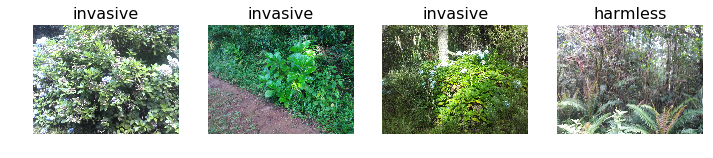

In [20]:
#selected at random
correct = np.where(our_labels == expected_labels)[0]
print("found %d correct labels" % len(correct))
idx = np.random.permutation(correct)
titles = np.where(our_labels[idx[:n_view]] == 0.0, 'harmless', 'invasive')
plots_idx(idx[:n_view], titles)

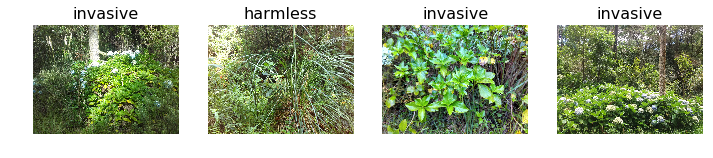

In [21]:
idx = np.random.permutation(correct)
titles = np.where(our_labels[idx[:n_view]] == 0.0, 'harmless', 'invasive')
plots_idx(idx[:n_view], titles)

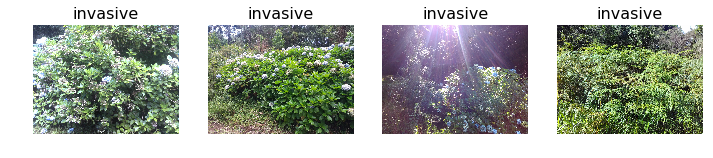

In [22]:
idx = np.random.permutation(correct)
titles = np.where(our_labels[idx[:n_view]] == 0.0, 'harmless', 'invasive')
plots_idx(idx[:n_view], titles)

### Incorrectly labeled images

found 70 incorrect labels


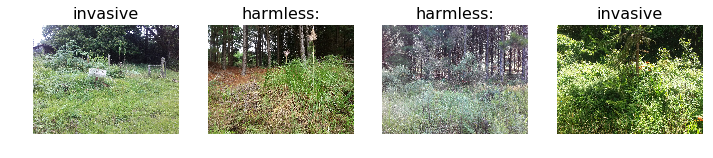

In [23]:
#selected at random
incorrect = np.where(our_labels != expected_labels)[0]
print("found %d incorrect labels" % len(incorrect))
idx = np.random.permutation(incorrect)
titles = np.where(our_labels[idx[:n_view]] == 0.0, 'harmless:', 'invasive')
plots_idx(idx[:n_view], titles)

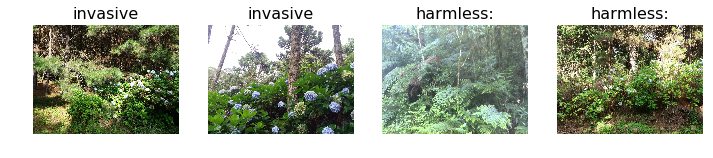

In [24]:
idx = np.random.permutation(incorrect)
titles = np.where(our_labels[idx[:n_view]] == 0.0, 'harmless:', 'invasive')
plots_idx(idx[:n_view], titles)

### Images with highest uncertainty

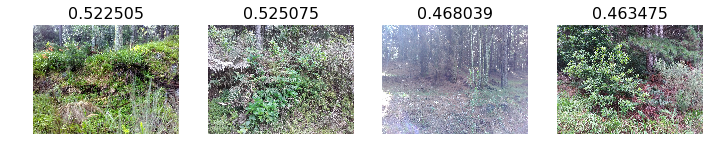

In [25]:
most_uncertain = np.argsort(abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain[:n_view]])

### Confustion matrix

[[32 23]
 [47 50]]


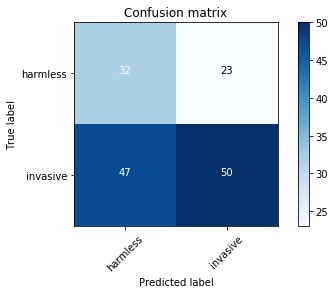

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)
plot_confusion_matrix(cm, valid_batches.class_indices)

## Run predictions

In [29]:
import time

In [27]:
#preds is a numpy array of predictions

test_batches, preds = vgg.test(test_path)

Found 1379 images belonging to 3 classes.


In [30]:
#save predictions
filenames = test_batches.filenames
ts = str(int(time.time()))[-5:]
save_array(results_path + ts + '_preds.dat', preds)
save_array(results_path + ts + '_filenames.dat', filenames)

## Evaluate predictions

In [31]:
from PIL import Image
evals = 10
image_display_size = 512, 512

In [32]:
preds[:evals]

array([[ 0.944 ,  0.056 ],
       [ 0.9939,  0.0061],
       [ 0.3898,  0.6102],
       [ 0.9831,  0.0169],
       [ 0.9775,  0.0225],
       [ 0.4146,  0.5854],
       [ 0.6199,  0.3801],
       [ 0.9892,  0.0108],
       [ 0.9969,  0.0031],
       [ 0.9978,  0.0022]], dtype=float32)

testfile 0[ 0.944  0.056]


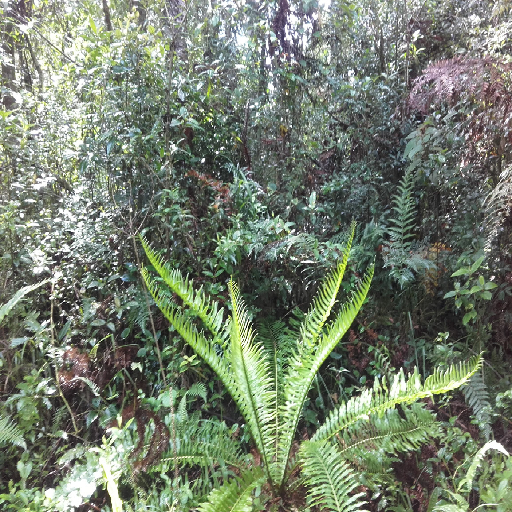

In [33]:
testfile = 0
print("testfile %d" % testfile + np.array_str(preds[testfile]))
im = Image.open(test_path + filenames[testfile])
im.resize(image_display_size)

## Submit to Kaggle
Create file then submit offline

In [34]:
%cd $results_path
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
is_invasive = preds[:,1]
submission = np.stack((ids, is_invasive), axis = 1)
filename = "kevin" + ts + ".csv"
np.savetxt(filename, submission, fmt="%d,%.5f", header='name,invasive', comments='')

/home/ymchu/laudai_DLtest_InvasiveSpecies/data/invasive_species/results


ValueError: invalid literal for int() with base 10: '/471'